# Setup

## Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
import itertools

warnings.filterwarnings('ignore')
# set to show all columns
pd.set_option('display.max_columns', 55)

## Declarations

In [26]:
# Function for Dicky Fuller Test
def dicky_fuller_test(dataset, feature):

    data = dataset[feature]

    # Print Out Heading for Test
    print('Results of Dickey-Fuller Test for:', feature)

    # Set test arguments and run
    test_results = adfuller(data, autolag='AIC')

    # Extract test results
    print("1. ADF: ", test_results[0])
    print("p-value: ", test_results[1])
    print("No. of lags: ", test_results[2])
    print("No. of observation used for ADF regression and critical value calculation: ", test_results[3])
    print("Critical Value: " )

    # Loop through Critical Values (inside 4) to display and print results
    for k,v in test_results[4].items():
        print("\t", k, " : ", v)

    if test_results[1] < .05:
        print("The p-value is significant at ", test_results[1],
              ", meaning we can reject the null hypothesis in favor that the data is stationary.")
    else:
        print("The p-value is too large at ", test_results[1],
              ", meaning we cannot reject the null hypothesis and assume the data is non-stationary.")

    # show a plot of the data


## Data Import

In [27]:
import pandas as pd
#df2 = pd.read_csv('..\\raw_data\\full-year-ny-data.csv', parse_dates = ['date'])

df2 = pd.read_csv('..\\raw_data\\final-ny-data-v2.csv', parse_dates = ['date'])
# check import is good
# df2.info
# df2.dtypes

# set feature interested in, in one place
lst_of_features = ['positive', 'death', 'hospitalized']
feature_interested_in = 'positive'

## Set Up Data (Positive Cases, Hospitalized, and Deaths)

In [28]:
# Set up dataframes with date index
df_positive_cases = pd.DataFrame(df2, columns = ['date', 'positive'])
df_hospitalized = pd.DataFrame(df2, columns = ['date', 'hospitalized'])
df_deaths = pd.DataFrame(df2, columns = ['date', 'death'])

df_positive_cases.set_index('date', inplace = True)
df_hospitalized.set_index('date', inplace = True)
df_deaths.set_index('date', inplace = True)

# ARIMA Model Approach

An Autoregressive Integrated Moving Average (ARIMA) model is a statistical analysis which uses time series data.

The model is intended to better understand the trajectory of future forecasts related to any particular time series.


## Stationary Data Check

For data to be stationary, the statistical properties of a system do not change over time, this means mean,
variance and co-various should be same over period of time.

## Rolling Mean Plot (??Keep??)

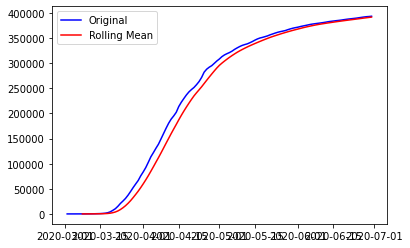

<Figure size 1080x360 with 0 Axes>

In [29]:
# Extract the mean
rollmean = df_positive_cases.rolling(window=7).mean()

# Visual plot of the actual data set and the rolling mean
plt.plot(df_positive_cases, color = 'blue', label = 'Original')
plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.figure(figsize=(15, 5))
plt.show()


# Getting Lag of Positive (??Remove??)

In [30]:
# display head of data frame
# print(df_positive_cases.head(15))

# difference has been set using periods (value of 11 gives difference of 11th past row; aka 11 days past)
df_positive_cases_diff = df_positive_cases.diff(periods=2)

# since the first 11 rows will have no difference to calculate, they will result in NA, hence we drop them
df_positive_cases_diff = df_positive_cases_diff.dropna()

# display results
print(df_positive_cases_diff.head())
print(df_positive_cases.head())


            positive
date                
2020-03-04       1.0
2020-03-05       2.0
2020-03-06      24.0
2020-03-07      33.0
2020-03-08      35.0
            positive
date                
2020-03-02         0
2020-03-03         1
2020-03-04         1
2020-03-05         3
2020-03-06        25


## AR Model

Auto Regressive Model : An autoregressive (AR) model predicts future behavior based on past behavior.

95
119


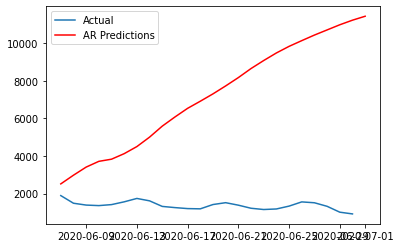

In [31]:
# divide data between training and test
# first get length of the first 80%
train_size = int(0.8 * len(df_positive_cases_diff))
# print(len(df_positive_cases_diff))

# use that length (80%) to set it as training data
train = df_positive_cases_diff[:train_size]

# set the rest for test data (20%)
test = df_positive_cases_diff[train_size:]

# train the model
model_AR = AR(train)
model_AR_fit = model_AR.fit()
start = len(train)
end = len(train)+len(test)
print(start)
print(end)

# predict and plot results
# **** TO DO: need to look at why Y axis values are negative and how to translate them
AR_predict = model_AR_fit.predict(start = start, end = end)
plt.plot(test)
plt.plot(AR_predict, color = 'red')
plt.legend(['Actual', 'AR Predictions'], loc='upper left')
plt.show()

## AR Conclusion

TO DO WRITE SUMMARY HERE

# ARIMA Model

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the
sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA
function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

In Time Series Analysis ARIMA the following assumptions have to be met:

* Data has to be stationary.
* Data should be univariate.
* Data should be in time series data format.


# Dicky Fuller Test

Below we will use the Dicky Fuller Test to assess if the data set we have is stationary or non-stationary.


## Test on Positive Cases

Results of Dickey-Fuller Test for: positive
1. ADF:  -3.189516427040356
p-value:  0.020599585879086686
No. of lags:  8
No. of observation used for ADF regression and critical value calculation:  112
Critical Value: 
	 1%  :  -3.4901313156261384
	 5%  :  -2.8877122815688776
	 10%  :  -2.5807296460459184
The p-value is significant at  0.020599585879086686 , meaning we can reject the null hypothesis in favor that the data is stationary.


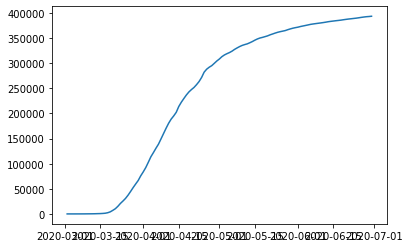

In [32]:
dicky_fuller_test(df_positive_cases, 'positive')
plt.plot(df_positive_cases)


## Test on Hospitalized

Results of Dickey-Fuller Test for: hospitalized
1. ADF:  -2.5984565381373734
p-value:  0.09331668941023669
No. of lags:  9
No. of observation used for ADF regression and critical value calculation:  111
Critical Value: 
	 1%  :  -3.490683082754047
	 5%  :  -2.8879516565798817
	 10%  :  -2.5808574442009578
The p-value is too large at  0.09331668941023669 , meaning we cannot reject the null hypothesis and assume the data is non-stationary.


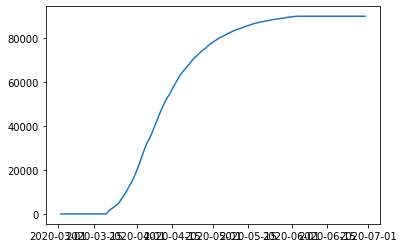

In [33]:
dicky_fuller_test(df_hospitalized, 'hospitalized')
plt.plot(df_hospitalized)


## Test on Deaths

Results of Dickey-Fuller Test for: death
1. ADF:  -2.3552340309285507
p-value:  0.1547717751990747
No. of lags:  3
No. of observation used for ADF regression and critical value calculation:  117
Critical Value: 
	 1%  :  -3.487517288664615
	 5%  :  -2.8865777180380032
	 10%  :  -2.5801239192052012
The p-value is too large at  0.1547717751990747 , meaning we cannot reject the null hypothesis and assume the data is non-stationary.


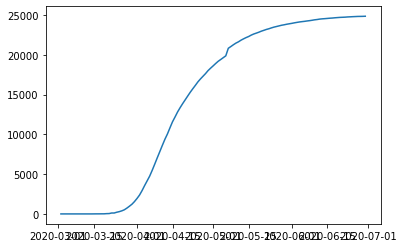

In [34]:
dicky_fuller_test(df_deaths, 'death')
plt.plot(df_deaths)

## Summary of the Dicky Fuller Tests

We can see from the above that the data for positive is considered stationary, while hospitalized and deaths were
evaluated to be non-stationary data. Therefore, we will have to apply lag in order to transform the
non-stationary data to stationary.

# ACF Plots

## ACF on Positive Cases

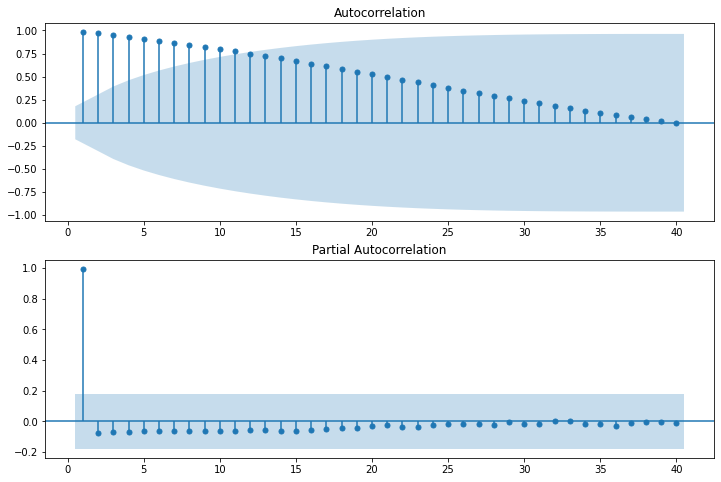

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_positive_cases['positive'].iloc[1:],lags=40,ax=ax1, zero = False)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_positive_cases['positive'].iloc[1:],lags=40,ax=ax2, zero = False)

### ACF on Hospitalized

### ACF on Deaths

## ARIMA Models

### Split Data for Postive Cases

In [36]:
# make sure column is float for ARIMA model, if not error
df_positive_cases['positive'] = pd.to_numeric(df_positive_cases['positive'], downcast='float')

# verify number of observations
print('Number of obseravations: ', df_positive_cases.size)

# use range 0 to end - 30
train_arima = df_positive_cases.iloc[:-15]

# use range from end - 30 to end
test_arima = df_positive_cases.iloc[-15:]

# check to see the dimensions of the train and test data
print('Training set dimensions: ', train_arima.shape)
print('Testing set dimensions: ', test_arima.shape)

Number of obseravations:  121
Training set dimensions:  (106, 1)
Testing set dimensions:  (15, 1)


### Model Training for Positive Cases

In [37]:
# p should be 1 (AR value)
# d should be 0 if we use original data that means that we did not implement and differences by using lag
# q set to 2

model_ARIMA = ARIMA(train_arima['positive'], order=(1,0,2))
model_ARIMA = model_ARIMA.fit()
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               positive   No. Observations:                  106
Model:                     ARMA(1, 2)   Log Likelihood                -958.529
Method:                       css-mle   S.D. of innovations           1933.374
Date:                Wed, 14 Apr 2021   AIC                           1927.057
Time:                        19:12:53   BIC                           1940.375
Sample:                    03-02-2020   HQIC                          1932.455
                         - 06-15-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.175e+05   1.92e+05      1.131      0.258    -1.6e+05    5.95e+05
ar.L1.positive     0.9995      0.001   1451.626      0.000       0.998       1.001
ma.L1.positive     1.2687      0.057     22.183      0.000       1.157       1.381
ma.L2.positive     0.8136      0.059     13.902      0.000       0.699       0.928
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
MA.1           -0.7797           -0.7881j            1.1086           -0.3741
MA.2           -0.7797           +0.7881j            1.1086            0.3741
-----------------------------------------------------------------------------
"""

### Model Prediction for Positive Cases

start arima at row:  106
end arima at row:   121


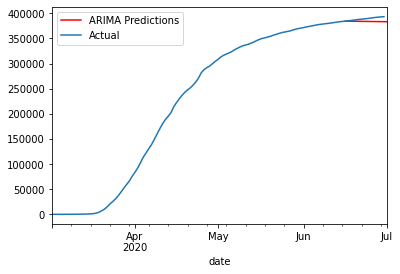

In [38]:
start_arima = len(train_arima)
print("start arima at row: ", start_arima)

end_arima = len(train_arima) + len(test_arima)
print("end arima at row:  ", end_arima)

#*** FEATURE PREDICTING ON MUST BE FLOAT 32 DATA TYPE ***

# print(df_diff_2.info)
# print(df_diff_2.dtypes)

# print(df_positive_cases.info)
# print(df_positive_cases.dtypes)

predict_arima = model_ARIMA.predict(start = start_arima, end = end_arima)
predict_arima.plot(color='red')
df_positive_cases['positive'].plot()
plt.legend(['ARIMA Predictions', 'Actual'], loc='best')

# Residual Analysis

## Analysis for Positive Cases

Root Mean Squared Error: 6038.996801141985


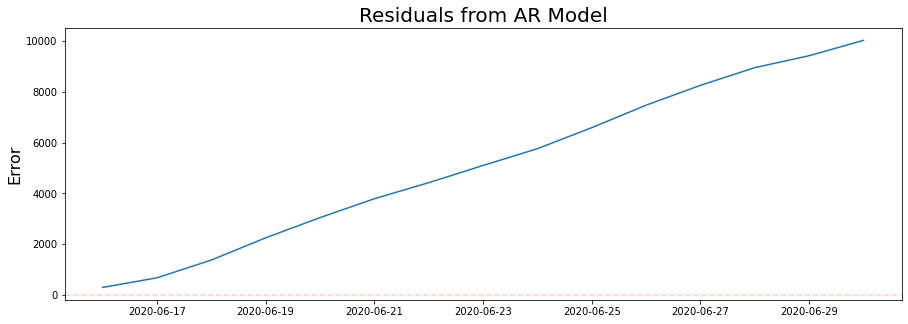

In [39]:
residuals = test_arima['positive'] - predict_arima

plt.figure(figsize=(15,5))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


# SARIMA Model

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly
supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the
 seasonal component of the series, as well as an additional parameter for the period of the seasonality.

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

Seasonal Elements

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

## Model Building for Positive Cases

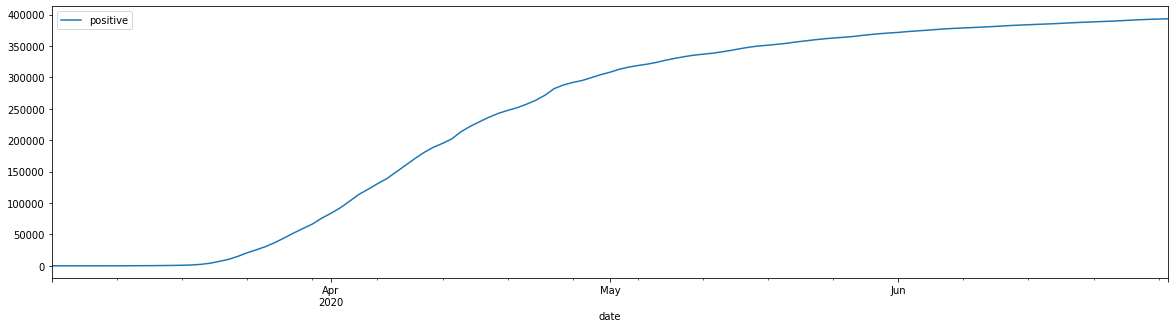

ARIMA(0, 0, 0)x(0, 0, 0, 3)3 - AIC:3354.8012732365924
ARIMA(0, 0, 0)x(0, 0, 1, 3)3 - AIC:3191.614265798929
ARIMA(0, 0, 0)x(0, 1, 0, 3)3 - AIC:2566.076939851985
ARIMA(0, 0, 0)x(0, 1, 1, 3)3 - AIC:2434.2154460986712
ARIMA(0, 0, 0)x(1, 0, 0, 3)3 - AIC:2557.0764883697307
ARIMA(0, 0, 0)x(1, 0, 1, 3)3 - AIC:2467.7874895736545
ARIMA(0, 0, 0)x(1, 1, 0, 3)3 - AIC:2227.2404446572073
ARIMA(0, 0, 0)x(1, 1, 1, 3)3 - AIC:2208.914211271571
ARIMA(0, 0, 1)x(0, 0, 0, 3)3 - AIC:3241.6982116552185
ARIMA(0, 0, 1)x(0, 0, 1, 3)3 - AIC:3142.1033103187865
ARIMA(0, 0, 1)x(0, 1, 0, 3)3 - AIC:2460.8570898622415
ARIMA(0, 0, 1)x(0, 1, 1, 3)3 - AIC:2255.910067482178
ARIMA(0, 0, 1)x(1, 0, 0, 3)3 - AIC:3187.95862060633
ARIMA(0, 0, 1)x(1, 0, 1, 3)3 - AIC:3136.0013088602395
ARIMA(0, 0, 1)x(1, 1, 0, 3)3 - AIC:2134.2886474332654
ARIMA(0, 0, 1)x(1, 1, 1, 3)3 - AIC:2093.302008926939
ARIMA(0, 1, 0)x(0, 0, 0, 3)3 - AIC:2348.9684301958155
ARIMA(0, 1, 0)x(0, 0, 1, 3)3 - AIC:2195.960206951166
ARIMA(0, 1, 0)x(0, 1, 0, 3)3 - AIC:2

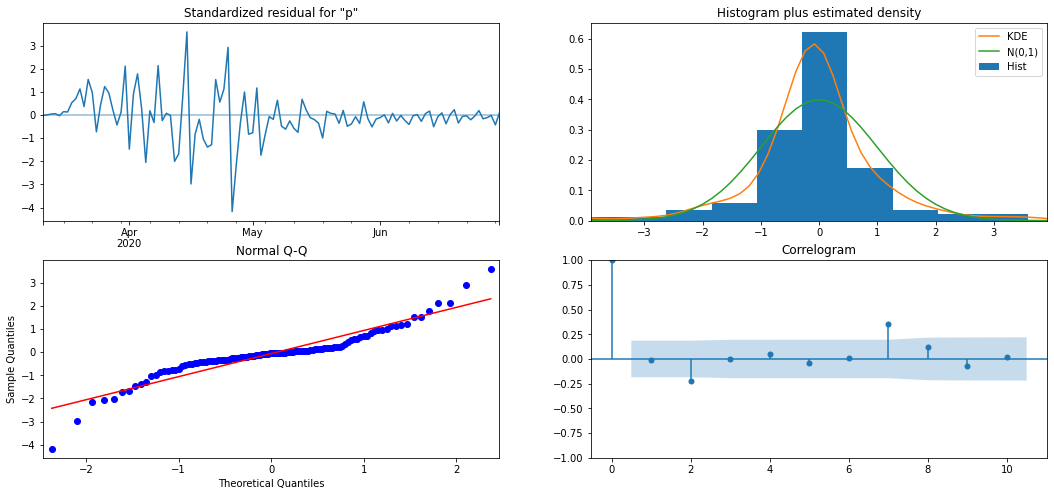

In [40]:
df_positive_cases.plot(figsize=(20,5))

plt.show()

# set each to range of 0-2
p = d = q = range(0, 2)

# generate list of 8 combination 3 digit tuples of 0s and 1
pdq = list(itertools.product(p, d, q))

# create variable m for period I want to cover
# 11 is good for full year data
m = 3
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df_positive_cases,order=param,seasonal_order=param_seasonal,
                                              enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()

            # place holder for m added below
            print('ARIMA{}x{}{} - AIC:{}'.format(param,param_seasonal,m,results.aic))
        except:
            continue

# we set the order and seasonal order to the results of the AIC execution
model = sm.tsa.statespace.SARIMAX(df_positive_cases,
                                order=(1, 1, 1),             # setting here AIC results
                                seasonal_order=(1, 1, 1, m), # setting here AIC results (m will always be constant)
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(18, 8))
plt.show()

## Model Forecasting for Positive Cases

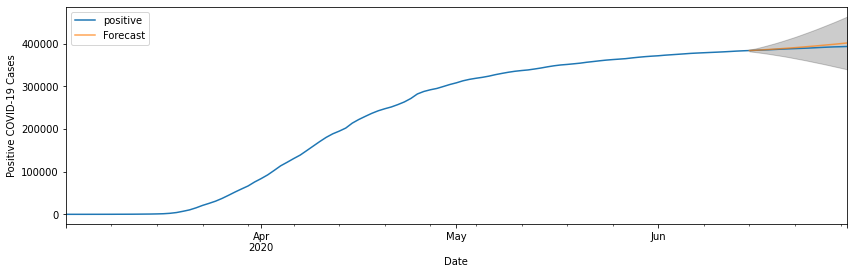

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2020-06-15'), dynamic=True)
pred_ci = pred.conf_int()
ax = df_positive_cases['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Positive COVID-19 Cases')
plt.legend()
plt.show()


